# Import

In [1]:
import os
import json
import data_utils
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# Func


In [2]:
def read_data(data_folder):
    data_paths = sorted(os.listdir(data_folder))
    data = []
    for i in data_paths:
        with open(os.path.join(data_folder, i), 'r', encoding='utf-8') as f:
            tmp = json.load(f)
            data.append(tmp)
    return data

In [3]:
data_folder = 'data_phase_1/label_3h_150524_revise_final'

In [4]:
data = read_data(data_folder)

In [5]:
len(data[0]['label'])

199

In [6]:
ent_count = data_utils.count_ent(data)
print(ent_count)

{'PER': 10889, 'ORG': 7745, 'LOC': 5307, 'TIME': 5737, 'AMT': 4819, 'DOC_ID': 3252, 'PETITIONER': 4112, 'RESPONDENT': 3974, 'COURT': 2530, 'STATUTE': 2217, 'RIGHT': 1907, 'CRIME_LOCATION': 757, 'PROVISION': 7995, 'VICTIM': 1691, 'CRIME_TIME': 28416, 'CRIMINAL': 441, 'CRIME_TOOL': 158}


In [7]:
overlap_count = data_utils.count_overlap(data)
print(overlap_count)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [02:26<00:00,  1.37it/s]

{'PER-PETITIONER': 2481, 'PER-RESPONDENT': 2520, 'LOC-ORG': 1109, 'COURT-LOC': 468, 'CRIME_LOCATION-LOC': 487, 'CRIME_TIME-TIME': 3794, 'PETITIONER-RESPONDENT': 1250, 'RESPONDENT-VICTIM': 232, 'STATUTE-TIME': 65, 'PROVISION-TIME': 26, 'PROVISION-STATUTE': 217, 'DOC_ID-TIME': 121, 'CRIME_TIME-DOC_ID': 525, 'LOC-TIME': 55, 'ORG-RESPONDENT': 12, 'ORG-VICTIM': 13, 'DOC_ID-STATUTE': 314, 'LOC-RESPONDENT': 47, 'CRIMINAL-RESPONDENT': 257, 'CRIMINAL-PER': 200, 'PER-VICTIM': 968, 'PETITIONER-VICTIM': 375, 'COURT-ORG': 930, 'LOC-PER': 296, 'ORG-TIME': 1, 'LOC-PETITIONER': 20, 'CRIME_TOOL-RIGHT': 32, 'CRIME_TIME-LOC': 5727, 'CRIME_TOOL-PER': 17, 'ORG-PER': 1246, 'DOC_ID-LOC': 70, 'CRIME_TOOL-PETITIONER': 17, 'AMT-DOC_ID': 925, 'DOC_ID-PROVISION': 187, 'LOC-PROVISION': 39, 'CRIME_LOCATION-ORG': 11, 'CRIME_TIME-STATUTE': 617, 'CRIME_TOOL-TIME': 12, 'CRIME_LOCATION-RESPONDENT': 15, 'CRIME_LOCATION-STATUTE': 1, 'CRIME_LOCATION-PROVISION': 1, 'CRIME_TIME-CRIME_TOOL': 1717, 'CRIME_LOCATION-CRIME_LOCATI

# Plot 

## Chord

In [8]:
# Import library
from d3blocks import D3Blocks  

In [11]:
# source=['US','FR','UK','NL','IT']
# target=['UK','US','US','FR','FR']
# weights=[200,450,200,150,500]

# create source, target, weights from cross_dict
source = []
target = []
weights = []
for i in overlap_count:
    u = i.split('-')[0]
    v = i.split('-')[1]
    if u=='CRIME_TIME' or v=='CRIME_TIME':
        continue
    source.append(u)
    target.append(v)
    weights.append(overlap_count[i])


df = pd.DataFrame(data=np.c_[source, target, weights], columns=['source','target','weight'])  
# Initialize
d3 = D3Blocks(frame=False)
d3.chord(df, color='source', opacity='source', cmap='Set2')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity based on the [source] node-opacity.
[d3blocks] >INFO> Set edge-colors based on the [source] node-color.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: /tmp/d3blocks/chord.html


## Ent count

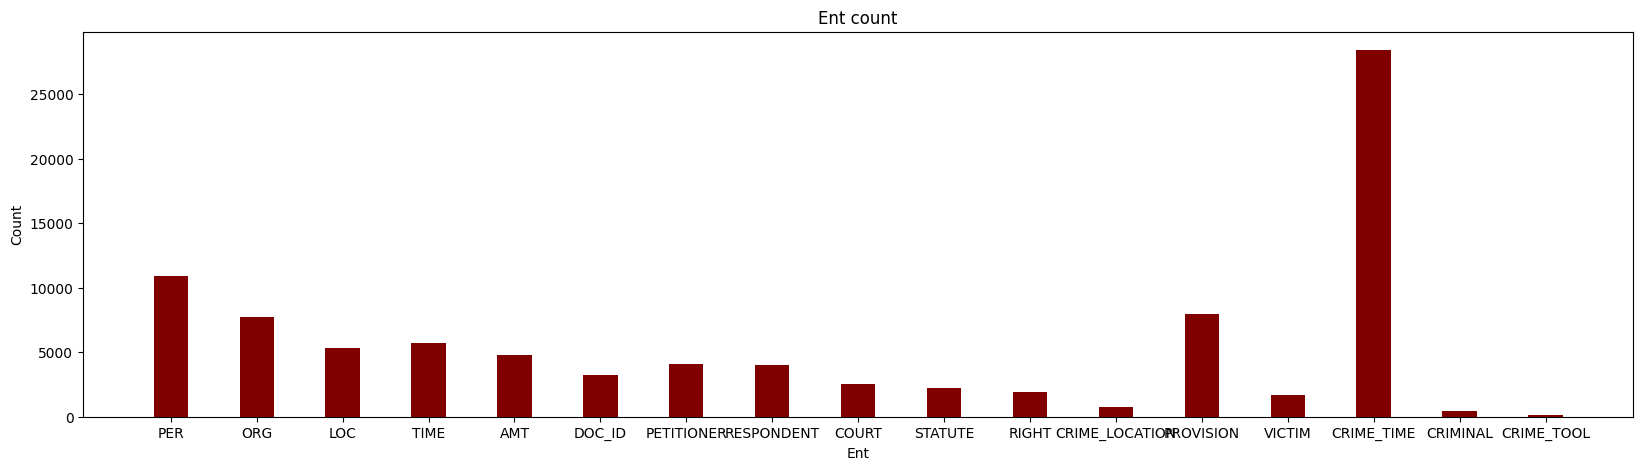

In [12]:
ent_ = list(ent_count.keys())
cnt_ = list(ent_count.values())
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(ent_, cnt_, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Ent")
plt.ylabel("Count")
plt.title("Ent count")
plt.show()

## Layer 1 vs 2 (Hypothesis)

In [16]:
layer_2 = ['COURT', 'RESPONDENT', 'PETITIONER', 'CRIME_LOCATION', 'VICTIM', 'CRIMINAL']
layer_1 = [x for x in ent_count if x not in layer_2]
layer_1

['PER',
 'ORG',
 'LOC',
 'TIME',
 'AMT',
 'DOC_ID',
 'STATUTE',
 'RIGHT',
 'PROVISION',
 'CRIME_TIME',
 'CRIME_TOOL']

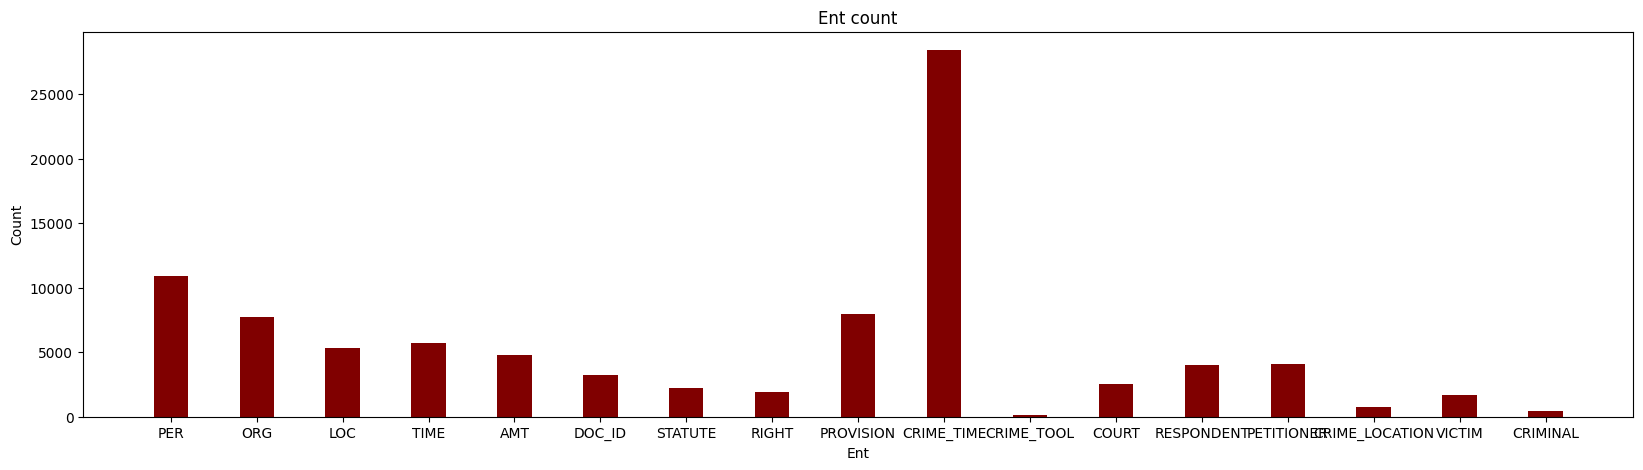

In [18]:
ent_ = layer_1 + layer_2
cnt_ = [ent_count[i] for i in ent_]
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(ent_, cnt_, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Ent")
plt.ylabel("Count")
plt.title("Ent count")
plt.show()

## Conclusion

About entity:
- CRIME_TIME: should be enhance/remove
- CRIME_TOOL: can't be auto labeled by current using llm, can try use advanced one or manually correct later 
- enhance -> semi-auto labeling
About overlapness:
- Mostly between PER - Petitioner- responder, COURT-LOC
- Remove the relation that not layer-1-to-2 